# scGHOST tutorial

**Note:** Change the path of the files accordingly!

Download data from here: https://drive.google.com/drive/folders/1SuzqQ_9dliAmTb-fGprFnN3aZrfWS-Fg?usp=share_link
Specifically, the data.txt and label_info.pickle

Now, specify the directory you downloaded the data:

In [9]:
%load_ext autoreload
%autoreload 2

In [10]:
data_dir = "/data/rzhang/scHiC_pfc/tutorial" # CHANGE IT!
chromsize_path = "/data/rzhang/Higashi/hg19.chrom.sizes.txt"
cytoband_path = "/data/rzhang/Higashi/cytoBand_hg19.txt"
fasta_path = "/home/rzhang/Data/hg19/hg19.fa"
scghost_path = '/home/rzhang/scGHOST'

# Step I: Configure the parameters
The detailed explanation of all the parameters is here: https://github.com/ma-compbio/Higashi/wiki/Configure-the-parameters
In this section, I'll provide an example config file and explain the parameters we used here:

In [2]:
config = '{data_dir}/config_m3c_pfc_500Kb.JSON'.format(data_dir=data_dir)
config_info = {
      "data_dir": data_dir,
      "structured": True,
      "input_format": "higashi_v1",
      "temp_dir": "{data_dir}/Temp/".format(data_dir=data_dir),
      "genome_reference_path": chromsize_path,
      "cytoband_path": cytoband_path,
      "chrom_list": [
            "chr1",
            "chr2",
            "chr3",
            "chr4",
            "chr5",
            "chr6",
            "chr7",
            "chr8",
            "chr9",
            "chr10",
            "chr11",
            "chr12",
            "chr13",
            "chr14",
            "chr15",
            "chr16",
            "chr17",
            "chr18",
            "chr19",
            "chr20",
            "chr21",
            "chr22"
      ],
      "resolution": 500000,
      "resolution_cell": 500000,
      "resolution_fh": [
            500000
      ],
      "embedding_name": "test",
      "minimum_distance": 500000,
      "maximum_distance": -1,
      "local_transfer_range": 0,
      "loss_mode": "zinb",
      "dimensions": 128,
      "impute_list": [
            "chr1",
            "chr2",
            "chr3",
            "chr4",
            "chr5",
            "chr6",
            "chr7",
            "chr8",
            "chr9",
            "chr10",
            "chr11",
            "chr12",
            "chr13",
            "chr14",
            "chr15",
            "chr16",
            "chr17",
            "chr18",
            "chr19",
            "chr20",
            "chr21",
            "chr22"
      ],
      "neighbor_num": 5,
      "cpu_num": 32,
      "gpu_num": 4,
      "batch_id": "batch id",
      "embedding_epoch": 60,
      "correct_be_impute": True
}
import json
with open(config,"w") as f:
    json.dump(config_info, f, indent = 6)

# Step II: Start running Higashi
## 1. Import package, set the path to the configuration JSON file

In [3]:
from higashi.Higashi_wrapper import *
higashi_model = Higashi(config)

## 2. Process scHi-C data
This include: turning contacts into binned contact maps, converting into hypergraph format that Higashi will use. (Take a while but only need to be run once.)

In [4]:
higashi_model.process_data()

generating start/end dict for chromosome
extracting from data.txt
First calculating how many lines are there
There are 1330348175 lines


 - Processing :   0%|          | 0/1330348175 [00:00<?, ?it/s]

generating contact maps for baseline
data loaded
228887273 False
chr1 split_num 6
chr2 split_num 8
chr3 split_num 6
chr4 split_num 5
chr5 split_num 5
chr6 split_num 5
chr7 split_num 4
chr8 split_num 4
chr9 split_num 2
chr10 split_num 3
chr11 split_num 3
chr12 split_num 3
chr13 split_num 2
chr14 split_num 2
chr15 split_num 1
chr16 split_num 1
chr17 split_num 1
chr18 split_num 1
chr19 split_num 1
chr20 split_num 1


creating matrices tasks:   0%|          | 0/66 [00:00<?, ?it/s]

0 correct be for batch batch_181218 SpearmanrResult(correlation=0.7741495636290082, pvalue=8.406977219463987e-93)
total_feats_size 2119


  0%|          | 0/22 [00:00<?, ?it/s]

## 3. Run Higashi model for embeddings

In [6]:
higashi_model.prep_model()
# Stage 1 training
# higashi_model.train_for_embeddings()

cpu_num 32
setting to gpu:3
training on data from: ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22']
total_sparsity_cell 0.13996900224314257
contractive loss
batch_size 512
Node type num [4238  499  487  397  383  362  343  319  293  283  272  271  268  231
  215  206  181  163  157  119  127   97  103] [ 4238  4737  5224  5621  6004  6366  6709  7028  7321  7604  7876  8147
  8415  8646  8861  9067  9248  9411  9568  9687  9814  9911 10014]
(4238, 3)
initial removing BE
initial removing BE
start making attribute
(4238, 4258)
(499, 521)
(487, 509)
(397, 419)
(383, 405)
(362, 384)
(343, 365)
(319, 341)
(293, 315)
(283, 305)
(272, 294)
(271, 293)
(268, 290)
(231, 253)
(215, 237)
(206, 228)
(181, 203)
(163, 185)
(157, 179)
(119, 141)
(127, 149)
(97, 119)
(103, 125)


  0%|          | 0/300 [00:00<?, ?it/s]

loss 0.8193033933639526 loss best 0.8009539842605591 epochs 86

initializing data generator


  0%|          | 0/22 [00:00<?, ?it/s]

initializing data generator


  0%|          | 0/22 [00:00<?, ?it/s]

Visualize the embedding results from Higashi

In [7]:
def vis_embedding(embedding, cell_type, batch, neuron_subtype):
    from umap import UMAP
    import seaborn as sns
    import matplotlib.pyplot as plt

    pal1 = {"L2/3": "#e51f4e", "L4": "#45af4b", "L5": "#ffe011", "L6": "#0081cc",
            "Ndnf": "#ff7f35", "Vip": "#951eb7", "Pvalb": "#4febee",
            "Sst": "#ed37d9", "Astro": "#d1f33c", "ODC": "#f9bdbb",
            "OPC": "#067d81", "MG": "#e4bcfc", "MP": "#ab6c1e",
            "Endo": "#780100"}

    vec = UMAP(n_components=2, n_neighbors=15, random_state=0).fit_transform(embedding)
    fig = plt.figure(figsize=(15, 10))
    ax = plt.subplot(2, 2, 1)
    sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=cell_type, ax=ax, s=5, alpha=0.8, linewidth=0, palette=pal1)
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
    ax.title.set_text("fig1: umap - major cell type")
    ax = plt.subplot(2, 2, 2)
    sns.scatterplot(x=vec[:, 0], y=vec[:, 1], hue=batch, ax=ax, s=5, alpha=0.8, linewidth=0)
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
    ax.title.set_text("fig2: umap - batch id")
    
    neuron_mask = np.isin(cell_type, np.asarray(['L2/3', 'L4', 'L5', 'L6', 'Ndnf', "Vip", 'Pvalb', 'Sst']))

    pal_all = {"Exc_L1-3_CUX2":"#8b172f",
    "Exc_L2-4_RORB":"#f06d96",
    "Exc_L4-5_FOXP2":"#af9430",
    "Exc_L4-5_TOX":"#f8de5d",
    "Exc_L4-6_LRRK1":"#454520",
    "Exc_L4_PLCH1":"#47ae49",
    "Exc_L5-6_PDZRN4":"#3ebeb1",
    "Exc_L6_TLE4":"#56b6e7",
    "Exc_L6_TSHZ2":"#0b6c9f",
    "Inh_CGE-MGE_CHST9":"#fab18e",
    "Inh_CGE_LAMP5":"#9b74ac",
    "Inh_CGE_NDNF":"#f57f3a",
    "Inh_CGE_VIP":"#884197",
    "Inh_MGE_B3GAT2":"#dc9fc7",
    "Inh_MGE_CALB1":"#1a8989",
    "Inh_MGE_PVALB":"#74cdd8",
    "Inh_MGE_UNC5B":"#aad4f1",
    "Outlier": "#000000"}
    ax = plt.subplot(2, 2, 3)
    sns.scatterplot(x=vec[neuron_mask, 0], y=vec[neuron_mask, 1],
                    hue=neuron_subtype[neuron_mask], ax=ax, s=10, alpha=0.8, linewidth=0, palette=pal_all)
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
    ax.title.set_text("fig3: only neuron cells - coordinate same as fig2")
    
    ax = plt.subplot(2, 2, 4)
    vec2 = UMAP(n_components=2, n_neighbors=15, random_state=0).fit_transform(embedding[neuron_mask])
    sns.scatterplot(x=vec2[:, 0], y=vec2[:, 1],
                    hue=neuron_subtype[neuron_mask], ax=ax, s=10, alpha=0.8, linewidth=0, palette=pal_all)
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=1)
    ax.title.set_text("fig4: UMAP on only neuron cells")
    plt.tight_layout()
    plt.show()
    return vec, vec2



Loading from last training results


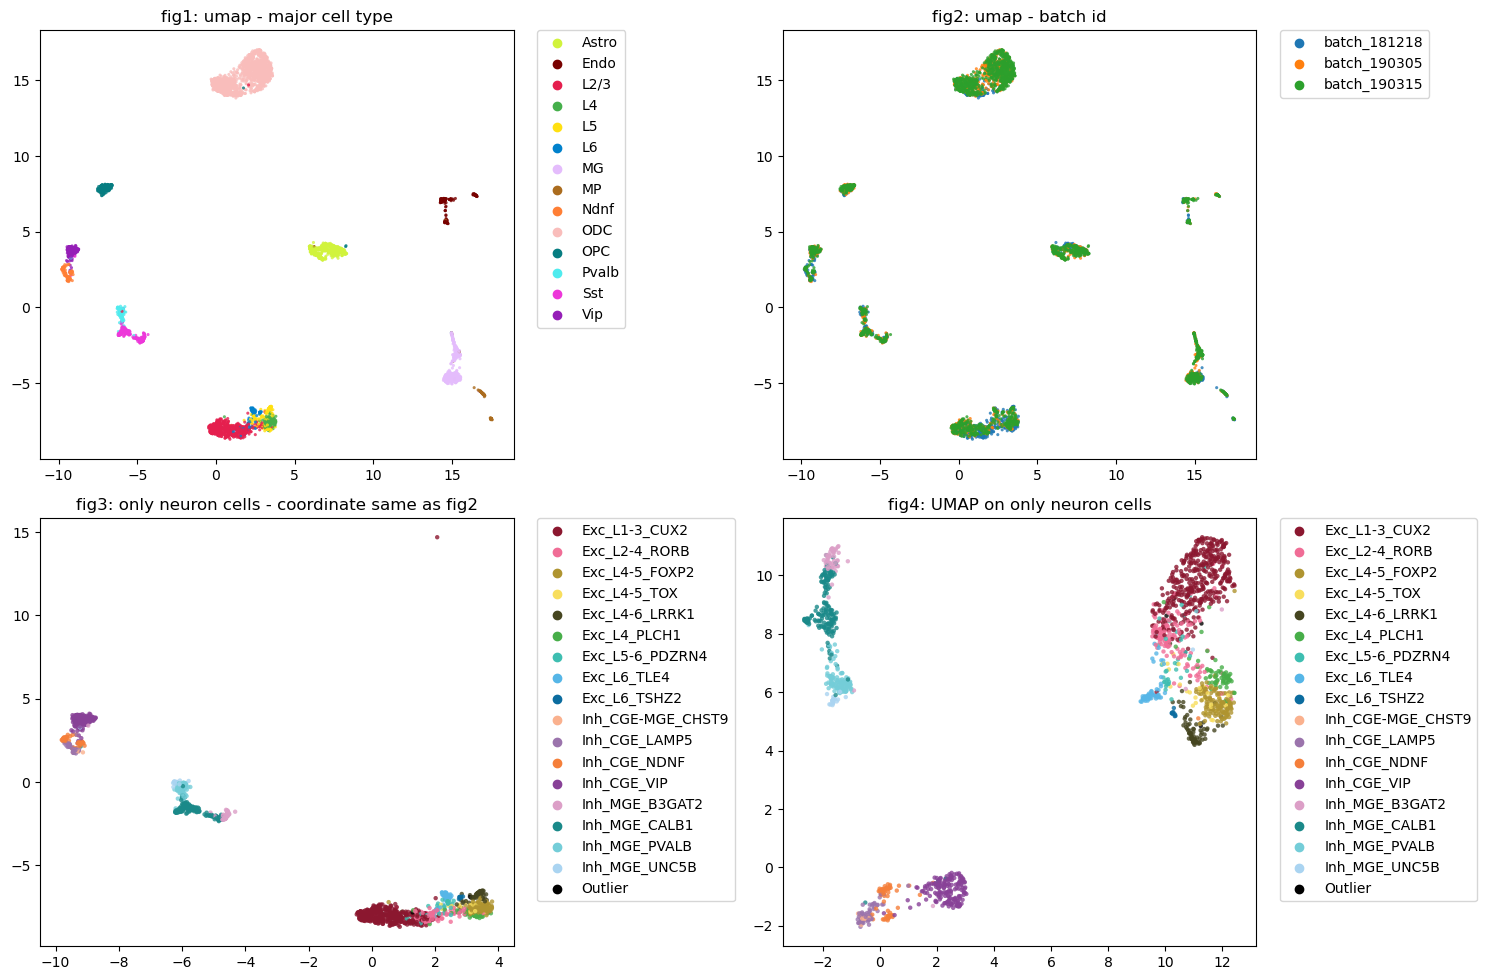

In [8]:
# fetch trained embeddings
embedding = higashi_model.fetch_cell_embeddings()

with open(os.path.join(higashi_model.data_dir, "label_info.pickle"), "rb") as f:
    label_info = pickle.load(f)

cell_type = np.asarray(label_info['cluster label'])
batch = np.asarray(label_info['batch id'])
neuron_subtype = np.asarray(label_info['major'])

vis_vec, _ = vis_embedding(embedding, cell_type, batch, neuron_subtype)

## 4. Use Higashi to impute the sparse contact maps

In [7]:
higashi_model.train_for_imputation_nbr_0()
# higashi_model.impute_no_nbr()
higashi_model.train_for_imputation_with_nbr()
higashi_model.impute_with_nbr()

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

pass_pseudo_id False
pass_pseudo_id False
Second stage training
[ Epoch 0 of 45 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3381, mse:  0.0000,  acc: 89.289 %, pearson: 0.649, spearman: 0.576, elapse: 123.273 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.3070,  acc: 91.143 %,pearson: 0.733, spearman: 0.599,elapse: 0.253 s

[ Epoch 1 of 45 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3190, mse:  0.0000,  acc: 91.004 %, pearson: 0.688, spearman: 0.592, elapse: 94.635 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.2946,  acc: 92.553 %,pearson: 0.730, spearman: 0.609,elapse: 0.566 s

[ Epoch 2 of 45 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3121, mse:  0.0000,  acc: 91.687 %, pearson: 0.700, spearman: 0.598, elapse: 99.826 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.2951,  acc: 92.840 %,pearson: 0.746, spearman: 0.615,elapse: 0.128 s

[ Epoch 3 of 45 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3072, mse:  0.0000,  acc: 92.074 %, pearson: 0.708, spearman: 0.602, elapse: 106.896 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.2840,  acc: 93.754 %,pearson: 0.757, spearman: 0.618,elapse: 0.436 s

[ Epoch 4 of 45 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3040, mse:  0.0000,  acc: 92.392 %, pearson: 0.722, spearman: 0.604, elapse: 101.948 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.2844,  acc: 94.029 %,pearson: 0.769, spearman: 0.621,elapse: 0.419 s

[ Epoch 5 of 45 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.3020, mse:  0.0000,  acc: 92.588 %, pearson: 0.724, spearman: 0.606, elapse: 98.997 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.2791,  acc: 94.192 %,pearson: 0.777, spearman: 0.622,elapse: 0.288 s

[ Epoch 6 of 45 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.2999, mse:  0.0000,  acc: 92.761 %, pearson: 0.728, spearman: 0.608, elapse: 95.302 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.2757,  acc: 94.438 %,pearson: 0.785, spearman: 0.625,elapse: 0.427 s

[ Epoch 7 of 45 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.2988, mse:  0.0000,  acc: 92.912 %, pearson: 0.731, spearman: 0.609, elapse: 93.767 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.2769,  acc: 94.484 %,pearson: 0.794, spearman: 0.624,elapse: 0.316 s

[ Epoch 8 of 45 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.2973, mse:  0.0000,  acc: 93.034 %, pearson: 0.738, spearman: 0.610, elapse: 99.308 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.2747,  acc: 94.648 %,pearson: 0.799, spearman: 0.626,elapse: 0.397 s

[ Epoch 9 of 45 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.2963, mse:  0.0000,  acc: 93.121 %, pearson: 0.730, spearman: 0.610, elapse: 97.369 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.2688,  acc: 95.087 %,pearson: 0.792, spearman: 0.628,elapse: 0.233 s

[ Epoch 10 of 45 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.2955, mse:  0.0000,  acc: 93.188 %, pearson: 0.736, spearman: 0.611, elapse: 98.600 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.2778,  acc: 94.503 %,pearson: 0.809, spearman: 0.627,elapse: 0.420 s
no improve: 1	
[ Epoch 11 of 45 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.2945, mse:  0.0000,  acc: 93.287 %, pearson: 0.744, spearman: 0.612, elapse: 94.286 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.2769,  acc: 94.655 %,pearson: 0.791, spearman: 0.628,elapse: 0.112 s

[ Epoch 12 of 45 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.2935, mse:  0.0000,  acc: 93.341 %, pearson: 0.745, spearman: 0.612, elapse: 95.458 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.2731,  acc: 94.920 %,pearson: 0.795, spearman: 0.630,elapse: 0.118 s
no improve: 1	
[ Epoch 13 of 45 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.2929, mse:  0.0000,  acc: 93.401 %, pearson: 0.744, spearman: 0.613, elapse: 97.936 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.2661,  acc: 95.584 %,pearson: 0.799, spearman: 0.633,elapse: 0.347 s

[ Epoch 14 of 45 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.2927, mse:  0.0000,  acc: 93.467 %, pearson: 0.746, spearman: 0.613, elapse: 98.582 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.2695,  acc: 95.143 %,pearson: 0.805, spearman: 0.632,elapse: 0.536 s
no improve: 1	
[ Epoch 15 of 45 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.2916, mse:  0.0000,  acc: 93.581 %, pearson: 0.750, spearman: 0.614, elapse: 100.372 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.2682,  acc: 95.497 %,pearson: 0.803, spearman: 0.631,elapse: 0.694 s

[ Epoch 17 of 45 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.2909, mse:  0.0000,  acc: 93.609 %, pearson: 0.753, spearman: 0.614, elapse: 103.697 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.2635,  acc: 95.587 %,pearson: 0.809, spearman: 0.633,elapse: 0.622 s
no improve: 1	
[ Epoch 18 of 45 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.2906, mse:  0.0000,  acc: 93.625 %, pearson: 0.748, spearman: 0.614, elapse: 93.974 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.2638,  acc: 95.783 %,pearson: 0.816, spearman: 0.635,elapse: 0.173 s

[ Epoch 19 of 45 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



- (Train)   bce:  0.2858, mse:  0.0000,  acc: 94.071 %, pearson: 0.767, spearman: 0.618, elapse: 89.445 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.2545,  acc: 96.523 %,pearson: 0.827, spearman: 0.639,elapse: 0.177 s

[ Epoch 31 of 45 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.2854, mse:  0.0000,  acc: 94.089 %, pearson: 0.762, spearman: 0.618, elapse: 93.076 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.2520,  acc: 96.768 %,pearson: 0.834, spearman: 0.639,elapse: 0.494 s
no improve: 1	
[ Epoch 32 of 45 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

- (Train)   bce:  0.2854, mse:  0.0000,  acc: 94.091 %, pearson: 0.765, spearman: 0.618, elapse: 88.569 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.2540,  acc: 96.657 %,pearson: 0.825, spearman: 0.641,elapse: 0.653 s
no improve: 2	
[ Epoch 33 of 45 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



- (Train)   bce:  0.3097, mse:  0.0000,  acc: 91.628 %, pearson: 0.715, spearman: 0.600, elapse: 124.524 s


  - (Validation)   :   0%|          | 0/10 [00:00<?, ?it/s]

- (Valid) bce:  0.2872,  acc: 93.249 %,pearson: 0.763, spearman: 0.621,elapse: 0.142 s
no improve: 2	
[ Epoch 5 of 30 ]


 - (Training) :   0%|          | 0/1000 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



setting to gpu:3
current_device cuda:3
/data/rzhang/Higashi/config_dir/config_m3c_pfc_50Kb.JSON /data/rzhang/scHiC_pfc/Temp_50k/model/model.chkpt_stage3_model test_nbr_5_impute_part_2 zinb 2826 4238
total number of triplets to predict: (10314253, 3)
Imputing test_nbr_5_impute_part_2: 1 of 1412, takes 5.85 s estimate 8257.31 s to finish
Imputing test_nbr_5_impute_part_2: 11 of 1412, takes 58.48 s estimate 7448.72 s to finish
Imputing test_nbr_5_impute_part_2: 21 of 1412, takes 111.08 s estimate 7357.69 s to finish
Imputing test_nbr_5_impute_part_2: 31 of 1412, takes 163.70 s estimate 7292.64 s to finish
Imputing test_nbr_5_impute_part_2: 41 of 1412, takes 216.30 s estimate 7232.86 s to finish
Imputing test_nbr_5_impute_part_2: 51 of 1412, takes 268.85 s estimate 7174.68 s to finish
Imputing test_nbr_5_impute_part_2: 61 of 1412, takes 321.40 s estimate 7118.13 s to finish
Imputing test_nbr_5_impute_part_2: 71 of 1412, takes 373.99 s estimate 7063.58 s to finish
Imputing test_nbr_5_impute

  0%|          | 0/22 [00:00<?, ?it/s]

start removing temp files


  0%|          | 0/4238 [00:00<?, ?it/s]

start removing temp files


  0%|          | 0/4238 [00:00<?, ?it/s]

start removing temp files


  0%|          | 0/4238 [00:00<?, ?it/s]

start removing temp files


  0%|          | 0/4238 [00:00<?, ?it/s]

start removing temp files


  0%|          | 0/4238 [00:00<?, ?it/s]

start removing temp files


  0%|          | 0/4238 [00:00<?, ?it/s]

start removing temp files


  0%|          | 0/4238 [00:00<?, ?it/s]

start removing temp files


  0%|          | 0/4238 [00:00<?, ?it/s]

start removing temp files


  0%|          | 0/4238 [00:00<?, ?it/s]

start removing temp files


  0%|          | 0/4238 [00:00<?, ?it/s]

start removing temp files


  0%|          | 0/4238 [00:00<?, ?it/s]

start removing temp files


  0%|          | 0/4238 [00:00<?, ?it/s]

start removing temp files


  0%|          | 0/4238 [00:00<?, ?it/s]

start removing temp files


  0%|          | 0/4238 [00:00<?, ?it/s]

start removing temp files


  0%|          | 0/4238 [00:00<?, ?it/s]

start removing temp files


  0%|          | 0/4238 [00:00<?, ?it/s]

start removing temp files


  0%|          | 0/4238 [00:00<?, ?it/s]

start removing temp files


  0%|          | 0/4238 [00:00<?, ?it/s]

start removing temp files


  0%|          | 0/4238 [00:00<?, ?it/s]

start removing temp files
start removing temp files
start removing temp files


## 5. Visually inspect the imputation results

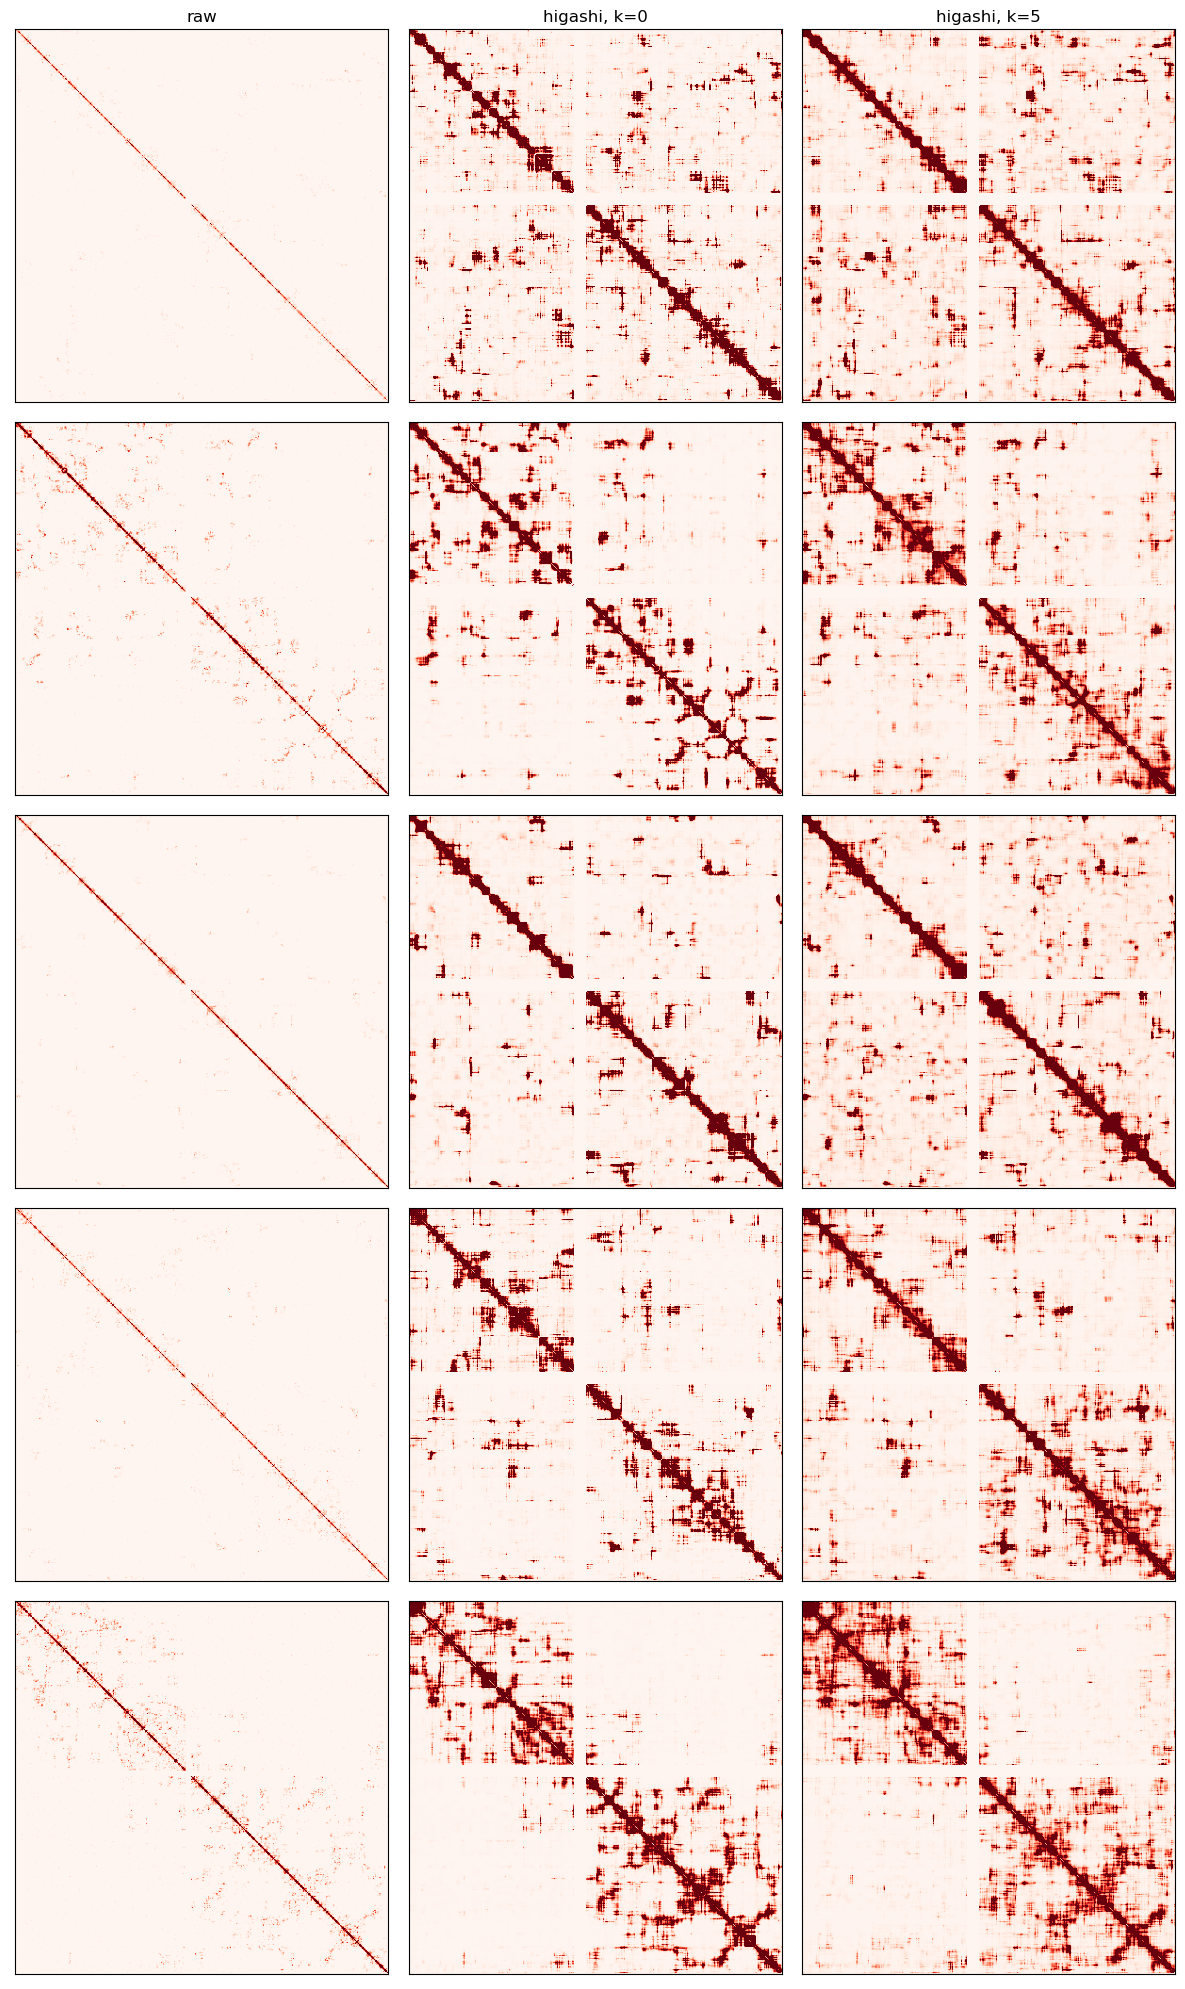

In [11]:
import matplotlib.pyplot as plt
count = 0
fig = plt.figure(figsize=(12, 4*5))
for id_ in np.random.randint(0, 4238, 5):
    # code to fetch imputed contact maps
    ori, nbr0, nbr5 = higashi_model.fetch_map("chr3", id_)
    count += 1
    ax = plt.subplot(5, 3, count * 3 - 2)
    ax.imshow(ori.toarray(), cmap='Reds', vmin=0.0, vmax=np.quantile(ori.data, 0.95))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    if count == 1:
        ax.set_title("raw")
    
    ax = plt.subplot(5, 3, count * 3 - 1)
    ax.imshow(nbr0.toarray(), cmap='Reds', vmin=0.0, vmax=np.quantile(nbr0.data, 0.95))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    if count == 1:
        ax.set_title("higashi, k=0")
    
    ax = plt.subplot(5, 3, count * 3)
    ax.imshow(nbr5.toarray(), cmap='Reds', vmin=0.0, vmax=np.quantile(nbr5.data, 0.95))
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    if count == 1:
        ax.set_title("higashi, k=5")
    
plt.tight_layout()

## 6. Call single cell A/B values based on imputation

In [15]:
import higashi
higashi_path = "/".join(higashi.__file__.split("/")[:-1])
higashi_path

'/data/rzhang/Higashi/higashi'

In [20]:
command = ["python", os.path.join(higashi_path, "CpG_density.py"), "-g", fasta_path, "-w", "500000",
          "-o", "cpg_density_hg19_500k.txt"]

In [21]:
import subprocess
subprocess.call(command)

0

In [22]:
command = ["python", os.path.join(higashi_path, "scCompartment.py"), "-c", config, "--calib_file", "cpg_density_hg19_500k.txt", "--calib", "--neighbor"]

In [23]:
subprocess.call(command)

Namespace(config='/data/rzhang/scHiC_pfc/tutorial/config_m3c_pfc_500Kb.JSON', neighbor=True, output='scCompartment', calib_file='cpg_density_hg19_500k.txt', calib=True)
(499, 499)
average cpg 0.0057554400000000006 0.017458719999999997
average cpg 0.01411490909090909 0.00598890909090909


100%|██████████| 4238/4238 [01:33<00:00, 45.28it/s]


chr1 finished
(487, 487)
average cpg 0.012408333333333334 0.0059865000000000005
average cpg 0.014797833333333331 0.005568666666666667


100%|██████████| 4238/4238 [01:40<00:00, 42.33it/s]


chr2 finished
(397, 397)
average cpg 0.015040666666666666 0.006067444444444445
average cpg 0.014632619047619049 0.005812952380952381


100%|██████████| 4238/4238 [00:59<00:00, 71.68it/s]


chr3 finished
(383, 383)
average cpg 0.020802 0.0056298
average cpg 0.009988999999999998 0.006007714285714287


100%|██████████| 4238/4238 [01:05<00:00, 64.45it/s]


chr4 finished
(362, 362)
average cpg 0.012559599999999999 0.006127199999999999
average cpg 0.013070923076923075 0.005957923076923078


100%|██████████| 4238/4238 [01:02<00:00, 67.44it/s]


chr5 finished
(343, 343)
average cpg 0.014580500000000001 0.006300333333333334
average cpg 0.012952272727272729 0.005439090909090907


100%|██████████| 4238/4238 [00:53<00:00, 78.91it/s]


chr6 finished
(319, 319)
average cpg 0.019408166666666667 0.0061101666666666665
average cpg 0.01675435 0.0053615


100%|██████████| 4238/4238 [00:53<00:00, 79.84it/s]


chr7 finished
(293, 293)
average cpg 0.013737777777777778 0.0073688888888888875
average cpg 0.01714725 0.005783599999999998


100%|██████████| 4238/4238 [00:51<00:00, 82.31it/s] 


chr8 finished
(283, 283)
average cpg 0.0100773 0.0067694
average cpg 0.0232915625 0.0070323749999999996


100%|██████████| 4238/4238 [00:50<00:00, 84.75it/s] 


chr9 finished
(272, 272)
average cpg 0.014479625 0.007820500000000001
average cpg 0.01578536842105263 0.005664526315789473


100%|██████████| 4238/4238 [00:53<00:00, 79.60it/s]


chr10 finished
(271, 271)
average cpg 0.016051000000000003 0.0053529090909090905
average cpg 0.017147375 0.005969375


100%|██████████| 4238/4238 [00:41<00:00, 102.33it/s]


chr11 finished
(268, 268)
average cpg 0.015274857142857142 0.006477714285714287
average cpg 0.016858631578947368 0.005411684210526316


100%|██████████| 4238/4238 [00:40<00:00, 105.76it/s]


chr12 finished
(231, 231)
average cpg 0.014189950000000002 0.0061906


100%|██████████| 4238/4238 [00:30<00:00, 137.87it/s]


chr13 finished
(215, 215)
average cpg 0.014904333333333334 0.006290555555555556


100%|██████████| 4238/4238 [00:34<00:00, 123.50it/s]


chr14 finished
(206, 206)
average cpg 0.013844588235294119 0.007751882352941177


100%|██████████| 4238/4238 [00:28<00:00, 149.11it/s]


chr15 finished
(181, 181)
average cpg 0.03127571428571429 0.009432
average cpg 0.02255088888888889 0.006563777777777778


100%|██████████| 4238/4238 [00:27<00:00, 155.52it/s]


chr16 finished
(163, 163)
average cpg 0.0212728 0.0106788
average cpg 0.0067638181818181825 0.021205818181818183


100%|██████████| 4238/4238 [00:23<00:00, 181.62it/s]


chr17 finished
(157, 157)
average cpg 0.014881333333333333 0.006038666666666667


100%|██████████| 4238/4238 [00:25<00:00, 167.81it/s]


chr18 finished
(119, 119)
average cpg 0.009581000000000001 0.027782
average cpg 0.013053666666666667 0.024062333333333335


100%|██████████| 4238/4238 [00:17<00:00, 241.35it/s]


chr19 finished
(127, 127)
average cpg 0.0125976 0.0075712
average cpg 0.014967285714285712 0.008531285714285713


100%|██████████| 4238/4238 [00:17<00:00, 248.85it/s]


chr20 finished
(97, 97)
average cpg 0.02375742857142857 0.006402857142857143


  1%|          | 43/4238 [00:00<00:09, 429.11it/s]

chr21 finished
(103, 103)
average cpg 0.018780285714285715 0.011153142857142858


100%|██████████| 4238/4238 [00:10<00:00, 414.85it/s]


chr22 finished


0

# Step III: Start to prep the JSON file for scGHOST

In [57]:
with open(config,"r") as f:
    config_info = json.load(f)
scg_config = '{data_dir}/config_m3c_pfc_500Kb_scg.JSON'.format(data_dir=data_dir)

In [58]:
# filepath settings
schic_directory = config_info['temp_dir']
label_info_path = os.path.join(config_info['data_dir'], "label_info.pickle")
label_info_cell_type_key = "cluster label"
scg_out_directory = os.path.join(config_info['temp_dir'] + "scghost")
NUM_CHROMOSOMES = len(config_info['chrom_list'])
embed_name = config_info['embedding_name']
chrom_list = config_info['chrom_list']
nbr_num= config_info['neighbor_num']
chromosomes = {chrom_num+1 : {
    'adj' : f'{schic_directory}/raw/{chrom}_sparse_adj.npy',
    'imputed' : f'{schic_directory}/{chrom}_{embed_name}_nbr_{nbr_num}_impute.hdf5',
    'integer' : chrom_num+1,
} for chrom_num,chrom in enumerate(chrom_list)}

chrom_sizes = config_info['genome_reference_path']
chrom_indices = None
embeddings_path = os.path.join(config_info['temp_dir'], 'embed', config_info['embedding_name']+"_0_origin.npy")
higashi_scab_path = os.path.join(config_info['temp_dir'], 'scCompartment.hdf5')

# hyperparameters
random_walk_num_walks = 50
random_walk_ignore_top = 0.02
random_walk_top_percentile = 0.25
eps = 1e-8
num_clusters = 5
batch_size = 16
epochs = 5
resolution = 500000
neighbor_contacts = False
kmeans_init = 1

# misc settings
nearest_neighbor_override = None
gpu_uniques = True
cluster_gpu_caching = True

In [59]:
settings_dict = {
    'schic_directory': schic_directory,
    'label_info': {
        'path': label_info_path,
        'cell_type_key': label_info_cell_type_key,
    },
    'data_directory': scg_out_directory,
    'chromosomes': chromosomes,
    'chrom_sizes': chrom_sizes,
    'chrom_indices': chrom_indices,
    'embeddings_path': embeddings_path,
    'higashi_scab_path': higashi_scab_path,
    'cell_type': None,
    'random_walk': {
        'num_walks': random_walk_num_walks,
        'ignore_top': random_walk_ignore_top,
        'top_percentile': random_walk_top_percentile,
    },
    'eps': eps,
    'num_clusters': num_clusters,
    'batch_size': batch_size,
    'epochs': epochs,
    'resolution': resolution,
    'neighbor_contacts': neighbor_contacts,
    'nearest_neighbor_override': nearest_neighbor_override,
    'gpu_uniques': gpu_uniques,
    'cluster_gpu_caching': cluster_gpu_caching,
    'kmeans_init': kmeans_init,
}


import json 

with open(scg_config, "w") as outfile: 
    json_string = json.dumps(settings_dict, indent=4)
    outfile.write(json_string)

# Step IV: Start to run scGHOST

In [61]:
import subprocess
scg_script_path = os.path.join(scghost_path, "scghost.py")
subprocess.call(['python {script_path} --config {json}'.format(script_path=scg_script_path, json=scg_config)],shell=True)

Parsing chromosomes
Parsing chromosome indices


100%|██████████| 22/22 [00:22<00:00,  1.02s/it]


Parsing cell types
Parsing remaining global variables
Clustering


100%|██████████| 4238/4238 [05:32<00:00, 12.76it/s]
/home/rzhang/scGHOST/modules/clustering.py:181: RuntimeWarning: Mean of empty slice.
  lbls_ab[k] = ab[ii].mean()
/home/rzhang/mambaforge/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0

read in scghost results and format output

In [66]:
import pickle
import os
from tqdm import trange

# enter labels.pkl path
label_filepath = os.path.join(scg_out_directory, 'labels.pkl')
labels = pickle.load(open(label_filepath,'rb'))

# enter cropped_indices.pkl path
cropped_indices_filepath = os.path.join(scg_out_directory, 'cropped_indices.pkl')
cropped_indices = pickle.load(open(cropped_indices_filepath,'rb'))

# enter resolution
resolution = 500000

# enter bed file output directory
bed_file_directory = os.path.join(scg_out_directory, 'bed_files')
chrom_prefix = 'chr' # change this to '' if chromosomes are labeled chr1,chr2,... instead of 1,2,...

sc_subcompartment_names = ['scA1','scA2','scB1','scB2','scB3'] # default for scGHOST k=5

os.makedirs(bed_file_directory,exist_ok=True)

num_cells = labels[ list( labels.keys() )[0] ].shape[0]

for cell_num in trange(num_cells):

    with open(os.path.join(bed_file_directory,f'cell_{cell_num}.bed'),'w') as f:

        for chromosome in labels:

            annotations = labels[chromosome][cell_num]

            for locus in range(len(annotations)):

                position = cropped_indices[chromosome][locus]
                annotation = sc_subcompartment_names[ annotations[locus] ]

                line = f'{chrom_prefix}{chromosome}\t{int(position * resolution)}\t{int((position+1) * resolution)}\t{annotation}\n'
                f.write(line)

100%|██████████████████████████████████████████████████████████████████| 4238/4238 [00:19<00:00, 214.63it/s]


In [68]:
scg_annotation = pd.read_csv(os.path.join(bed_file_directory,'cell_0.bed'), sep='\t', header=None)
print (scg_annotation)

          0         1         2     3
0      chr1         0    500000  scA1
1      chr1    500000   1000000  scB1
2      chr1   1000000   1500000  scA1
3      chr1   1500000   2000000  scA1
4      chr1   2000000   2500000  scA1
...     ...       ...       ...   ...
5347  chr22  49000000  49500000  scB2
5348  chr22  49500000  50000000  scB3
5349  chr22  50000000  50500000  scB3
5350  chr22  50500000  51000000  scB2
5351  chr22  51000000  51500000  scB1

[5352 rows x 4 columns]


UMAP visualization of subcompartments

In [71]:
def get_expected(M,eps=1e-8):
    E = np.zeros_like(M)
    l = len(M)

    for i in range(M.shape[0]):
        contacts = np.diag(M,i)
        expected = contacts.sum() / (l-i)
        # expected = np.median(contacts)
        x_diag,y_diag = np.diag_indices(M.shape[0]-i)
        x,y = x_diag,y_diag+i
        E[x,y] = expected

    E += E.T
    E = np.nan_to_num(E) + eps
    
    return E
    
def get_oe_matrix(M):
    E = get_expected(M)
    oe = np.nan_to_num(M / E)
    np.fill_diagonal(oe,1)
    
    return oe
    

stacked_pcs = []

for chrom_num in range(1,23):
    chrom_indices = pickle.load(open(os.path.join(scg_out_directory, 'chrom_indices.pkl'),'rb'))['%d' % chrom_num]
    sparse_M = np.load(chromosomes[chrom_num]['adj'],allow_pickle=True)
    pseudo_bulk = sparse_M.sum(axis=0).toarray()
    cov = np.sqrt(pseudo_bulk.sum(axis=1))
    pseudo_bulk /= cov[None,:]
    pseudo_bulk /= cov[:,None]
    pseudo_bulk = np.nan_to_num(pseudo_bulk)[chrom_indices][:,chrom_indices]
    pseudo_OE = get_oe_matrix(pseudo_bulk)

    Rpool = np.nan_to_num(np.corrcoef(pseudo_OE))
    Rpoolmean = Rpool.mean(axis=0,keepdims=True)
    Rpool = Rpool - Rpoolmean
    _,_,V = np.linalg.svd(Rpool)

    Es = np.load(os.path.join(scg_out_directory, f'{chrom_num}_embeddings.npy'))
    embedding_corrs = np.zeros((Es.shape[0],Es.shape[1],Es.shape[1]))

    num_cells = len(Es)

    for i in trange(num_cells):
        embedding_corrs[i] = np.corrcoef(Es[i])

    pcs = np.zeros((Es.shape[0],Es.shape[1]))

    for i,ec in enumerate(embedding_corrs):
        tec = ec - Rpoolmean
        pc = tec.dot(V[0,:].T)
        pcs[i] = pc
        
    stacked_pcs.append(pcs)
    
stacked_pcs = np.hstack(stacked_pcs)

100%|█████████████████████████████████████████████████████████████████| 4238/4238 [00:00<00:00, 7964.45it/s]


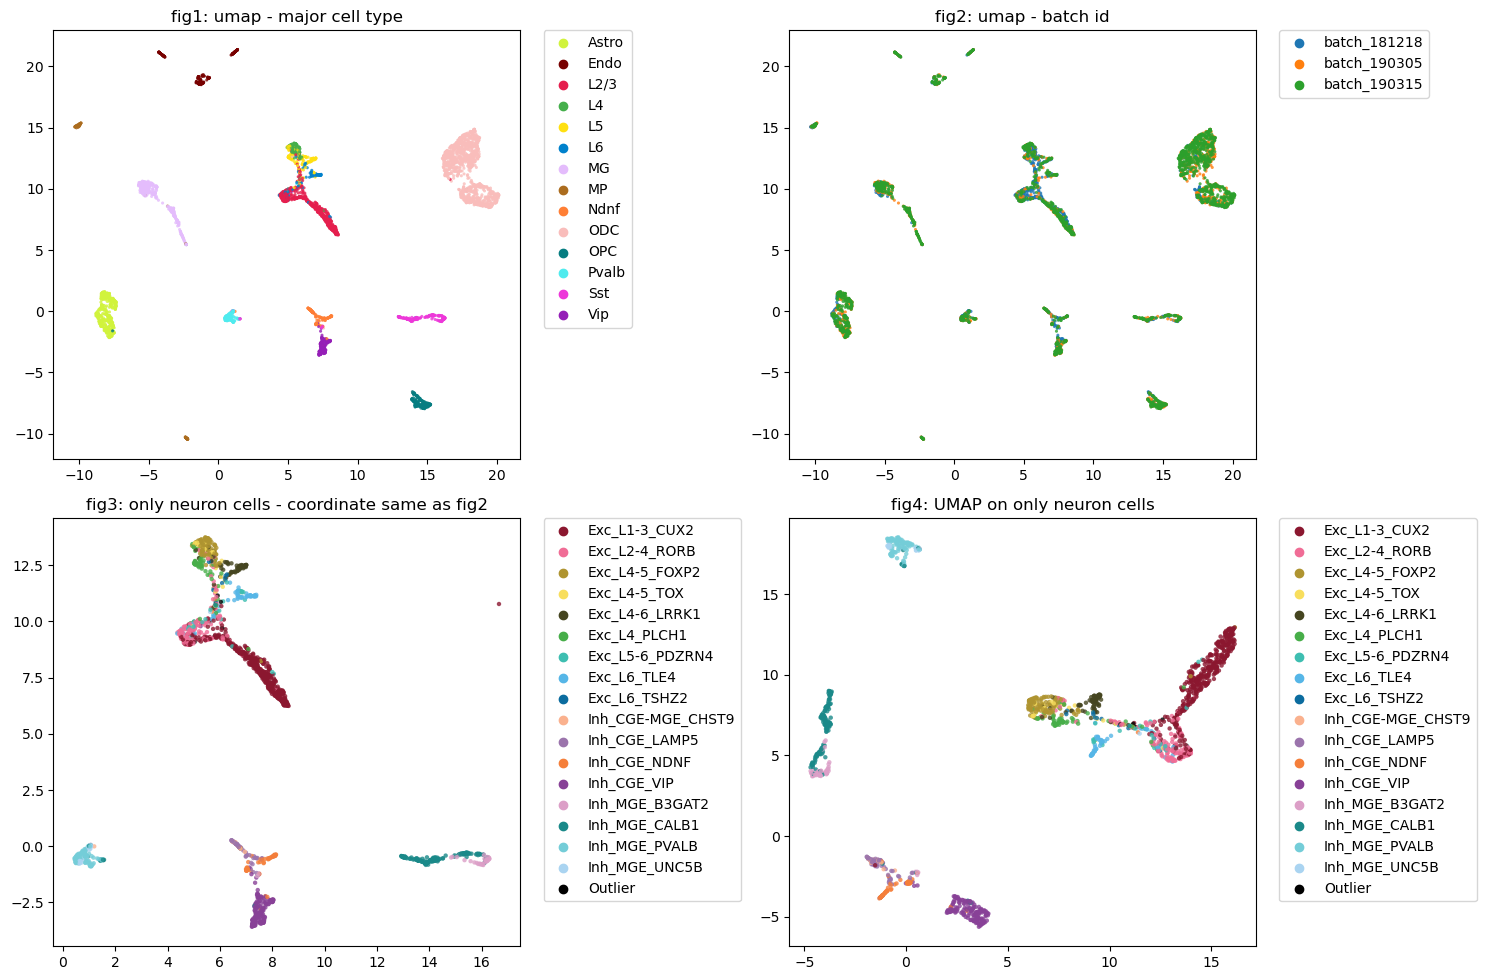

In [72]:
size = 32
pca = PCA(n_components=size)
embedding = pca.fit_transform(stacked_pcs)
vis_vec, _ = vis_embedding(embedding, cell_type, batch, neuron_subtype)